# Pogema DQN Example

In [1]:
!pip install -q pogema==1.2.2
!pip install -q stable_baselines3==2.1.0

### DQN

Sources:

* https://github.com/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/dqn_sb3.ipynb
* https://github.com/araffin/rl-tutorial-jnrr19/blob/sb3/1_getting_started.ipynb

In [2]:
import gymnasium as gym
from pogema import GridConfig
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

%load_ext autoreload
%autoreload 2
%matplotlib inline

grid_config = GridConfig(
    size=8,
    density=0.3,
    num_agents=1,
    max_episode_steps=30
)

env = gym.make("Pogema-v0",grid_config=grid_config)

/Users/wenyuxue/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:29: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
/Users/wenyuxue/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:34: UserWarning: WARN: It seems a Box observation space is an image but the lower and upper bounds are not [0, 255]. Actual lower bound: -1.0, upper bound: 1.0. Generally, CNN policies assume observations are within that range, so you may encounter an issue if the observation values are not.
  logger.warn(


In [4]:
# Evaluate untrained agent using separate env

val_env = gym.make("Pogema-v0",grid_config=grid_config)

val_dqn_model = DQN(
    "MlpPolicy",
    val_env,
    verbose=1,
    train_freq=16,
    gradient_steps=8,
    gamma=0.99,
    exploration_fraction=0.2,
    exploration_final_eps=0.07,
    target_update_interval=600,
    learning_starts=1000,
    buffer_size=10000,
    batch_size=128,
    learning_rate=4e-3,
    policy_kwargs=dict(net_arch=[256, 256]),
    seed=42,
)

mean_reward, std_reward = evaluate_policy(
    val_dqn_model,
    val_dqn_model.get_env(),
    deterministic=True,
    n_eval_episodes=20,
)

print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
mean_reward: 0.05 +/- 0.22


In [ ]:
# Train agent and save it
dqn_model.learn(total_timesteps=int(1.2e5))
dqn_model.save("saved/dqn_baseline")

### Load trained agent and evaluate it

In [11]:
dqn_model = DQN.load("saved/dqn_baseline")

env.reset()

mean_reward, std_reward = evaluate_policy(dqn_model, env, deterministic=True, n_eval_episodes=20)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:0.00 +/- 0.00


### Video Recording

In [9]:
from IPython.display import SVG, display
from pogema.animation import AnimationMonitor, AnimationConfig

env = AnimationMonitor(env)

obs, info = env.reset()

# terminated = truncated = [False, ...]

# while not all(terminated) and not all(truncated):
#     # Use random policy to make actions
#     obs, reward, terminated, truncated, info = env.step([env.action_space.sample() for _ in range(grid_config.num_agents)])

#terminated = truncated = [False, ...]
terminated = truncated = False

while not terminated or not truncated:
    # Use random policy to make actions
    print(env.action_space.sample())
    obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

0
2
2
0
0
0
0
2
1
0
1
0
2
0
4
1
0
2
2
3
1
0
0
3
0
4
0
1
1
4


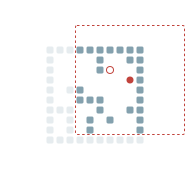

In [10]:
env.save_animation("render.svg", AnimationConfig(egocentric_idx=0))
display(SVG('render.svg'))

#### Evaluation Metric
-  Agent success rate (How often agent reaches the goal state )
-  Steps to Termination (Avg steps to termination)

In [21]:
def evaluate_success_rate(model, env, num_episodes=10):
    success_count = 0
    step_array = []
    for _ in range(num_episodes):
        obs = env.reset()

        # Check if observation is a tuple and extract the first element if true.
        if isinstance(obs, tuple):
            obs = obs[0]
        max_step = 100
        steps_taken = 0
        done = truncated = False
        while not done and max_step > 0:
            action, _ = model.predict(obs)
            next_obs, reward, done, truncated, info = env.step(action)
            print(action,max_step,success_count,done)
            max_step -= 1
            steps_taken += 1
            # Check if next_obs is a tuple and extract the first element if true.
            if isinstance(next_obs, tuple):
                next_obs = next_obs[0]
            obs = next_obs

            # Check if agent was successful in that episode.
            if done:
                success_count += 1
                step_array.append(steps_taken)
                break

    success_rate = success_count / num_episodes
    return success_rate, step_array

success_rate,step_array = evaluate_success_rate(dqn_model, env)
print(f"Agent Success Rate: {success_rate * 100:.2f}%")
print(f"steps to termination : {step_array}")

1 100 0 False
1 99 0 True
1 100 1 False
3 99 1 False
3 98 1 False
3 97 1 False
3 96 1 False
3 95 1 False
3 94 1 False
3 93 1 False
3 92 1 False
3 91 1 False
3 90 1 False
3 89 1 False
3 88 1 False
3 87 1 False
3 86 1 False
3 85 1 False
3 84 1 False
3 83 1 False
3 82 1 False
0 81 1 False
3 80 1 False
3 79 1 False
3 78 1 False
3 77 1 False
3 76 1 False
3 75 1 False
3 74 1 False
3 73 1 False
3 72 1 False
3 71 1 False
3 70 1 False
3 69 1 False
3 68 1 False
3 67 1 False
3 66 1 False
3 65 1 False
3 64 1 False
3 63 1 False
3 62 1 False
3 61 1 False
3 60 1 False
3 59 1 False
3 58 1 False
3 57 1 False
3 56 1 False
3 55 1 False
3 54 1 False
3 53 1 False
3 52 1 False
3 51 1 False
3 50 1 False
3 49 1 False
3 48 1 False
3 47 1 False
3 46 1 False
3 45 1 False
3 44 1 False
3 43 1 False
3 42 1 False
3 41 1 False
2 40 1 False
0 39 1 False
0 38 1 False
0 37 1 False
0 36 1 False
0 35 1 False
0 34 1 False
0 33 1 False
0 32 1 False
0 31 1 False
0 30 1 False
0 29 1 False
0 28 1 False
0 27 1 False
0 26 1 Fals